# Deep Learning for Healthcare Reproducibility
Reproduce Research Paper: Addressing wearable sleep tracking inequity: a new dataset and
novel methods for a population with sleep disorders

Initial Github Repo: https://github.com/WillKeWang/DREAMT_FE


In [ ]:
# Clone the repository
!git clone https://github.com/WillKeWang/DREAMT_FE.git

#clone version from our team github (TO RETAIN MODIFICATIONS)
!git clone https://github.com/divysunderraj/CS598_DLH_DREAMT_FE.git

%cd CS598_DLH_DREAMT_FE

# Install required packages
!pip install pandas numpy scipy scikit-learn matplotlib seaborn
!pip install imbalanced-learn xgboost lightgbm gpboost

In [2]:
import os
import json


#make data_folder use the dataset sample instead of the initial larger dataset
CONFIG = {
    'DATA_FOLDER': 'dataset_sample/E4_aggregate_subsample',
    'FEATURES_FOLDER': 'dataset_sample/features_df',
    'PARTICIPANT_INFO': 'dataset_sample/participant_info.csv',
    'RESULTS_FOLDER': 'results'
}

# Create results folder if it doesn't exist
os.makedirs(CONFIG['RESULTS_FOLDER'], exist_ok=True)

print("Configuration:")
print(json.dumps(CONFIG, indent=2))
print(f"\nData folder exists: {os.path.exists(CONFIG['DATA_FOLDER'])}")
print(f"Features folder exists: {os.path.exists(CONFIG['FEATURES_FOLDER'])}")
print(f"Participant info exists: {os.path.exists(CONFIG['PARTICIPANT_INFO'])}")

Configuration:
{
  "DATA_FOLDER": "dataset_sample/E4_aggregate_subsample",
  "FEATURES_FOLDER": "dataset_sample/features_df",
  "PARTICIPANT_INFO": "dataset_sample/participant_info.csv",
  "RESULTS_FOLDER": "results"
}

Data folder exists: True
Features folder exists: True
Participant info exists: True


In [8]:
!pip install aeon neurokit2
!pip install hyperopt
!pip install shap

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 31.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 491.3/491.3 kB 43.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 203.0/203.0 kB 15.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 26.9 MB/s eta 0:00:00


## Explore the Sample Dataset and their structure

In [9]:
#show an example of one of the pre-processed sample datasets
import pandas as pd
sample_file = '/content/DLH_DREAMT_FE/dataset_sample/E4_aggregate_subsample/subsampled_S002_whole_df.csv'
df = pd.read_csv(sample_file)
print(f"\nShape: {df.shape[0]} rows × {df.shape[1]} columns")
print(f"\nColumns ({len(df.columns)}):")
for i, col in enumerate(df.columns, 1):
    print(f"  {i:2d}. {col}")

print(f"\nFirst few rows:")
display(df.head())

print(f"\nData types:")
print(df.dtypes)

print(f"\nBasic statistics:")
display(df.describe())



Shape: 1000 rows × 14 columns

Columns (14):
   1. TIMESTAMP
   2. BVP
   3. ACC_X
   4. ACC_Y
   5. ACC_Z
   6. TEMP
   7. EDA
   8. HR
   9. IBI
  10. Sleep_Stage
  11. Obstructive_Apnea
  12. Central_Apnea
  13. Hypopnea
  14. Multiple_Events

First few rows:


,TIMESTAMP,BVP,ACC_X,ACC_Y,ACC_Z,TEMP,EDA,HR,IBI,Sleep_Stage,Obstructive_Apnea,Central_Apnea,Hypopnea,Multiple_Events
0,24637.359375,10.20,-13.0,-25.0,59.0,33.89,0.143449,71.57,1.03125,W,NaN,NaN,NaN,NaN
1,24637.375000,9.46,-12.0,-25.0,60.0,33.89,0.143449,71.57,1.03125,W,NaN,NaN,NaN,NaN
2,24637.390625,8.73,-12.0,-25.0,60.0,33.89,0.143449,71.57,1.03125,W,NaN,NaN,NaN,NaN
3,24637.406250,8.08,-12.0,-25.0,59.0,33.89,0.143449,71.57,1.03125,W,NaN,NaN,NaN,NaN
4,24637.421875,7.49,-12.0,-25.0,59.0,33.89,0.143449,71.57,1.03125,W,NaN,NaN,NaN,NaN



Data types:
TIMESTAMP            float64
BVP                  float64
ACC_X                float64
ACC_Y                float64
ACC_Z                float64
TEMP                 float64
EDA                  float64
HR                   float64
IBI                  float64
Sleep_Stage           object
Obstructive_Apnea    float64
Central_Apnea        float64
Hypopnea             float64
Multiple_Events      float64
dtype: object

Basic statistics:


,TIMESTAMP,BVP,ACC_X,ACC_Y,ACC_Z,TEMP,EDA,HR,IBI,Obstructive_Apnea,Central_Apnea,Hypopnea,Multiple_Events
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,0.0,0.0,0.0,0.0
mean,24645.164062,-0.333070,-13.261000,-25.459000,57.923000,33.874020,0.143593,70.532700,1.061406,NaN,NaN,NaN,NaN
std,4.512804,9.483653,0.781979,0.518254,0.643028,0.012665,0.001001,0.940803,0.005746,NaN,NaN,NaN,NaN
min,24637.359375,-29.210000,-16.000000,-27.000000,55.000000,33.840000,0.140887,68.870000,1.031250,NaN,NaN,NaN,NaN
25%,24641.261719,-6.545000,-14.000000,-26.000000,58.000000,33.870000,0.143449,69.580000,1.062500,NaN,NaN,NaN,NaN
50%,24645.164062,0.625000,-13.000000,-25.000000,58.000000,33.870000,0.143449,70.720000,1.062500,NaN,NaN,NaN,NaN
75%,24649.066406,6.875000,-13.000000,-25.000000,58.000000,33.890000,0.144729,71.350000,1.062500,NaN,NaN,NaN,NaN
max,24652.968750,23.930000,-11.000000,-25.000000,61.000000,33.890000,0.146010,71.620000,1.062500,NaN,NaN,NaN,NaN


In [10]:
sample_features_file = '/content/DLH_DREAMT_FE/dataset_sample/features_df/S002_domain_features_df.csv'
df = pd.read_csv(sample_features_file)
print(f"\nShape: {df.shape[0]} rows × {df.shape[1]} columns")
print(f"\nColumns ({len(df.columns)}):")
for i, col in enumerate(df.columns, 1):
    print(f"  {i:2d}. {col}")

print(f"\nFirst few rows:")
display(df.head())

print(f"\nData types:")
print(df.dtypes)

print(f"\nBasic statistics:")
display(df.describe())


Shape: 1048 rows × 139 columns

Columns (139):
   1. PPG_Rate_Mean
   2. HRV_MeanNN
   3. HRV_SDNN
   4. HRV_RMSSD
   5. HRV_SDSD
   6. HRV_CVNN
   7. HRV_CVSD
   8. HRV_MedianNN
   9. HRV_MadNN
  10. HRV_MCVNN
  11. HRV_IQRNN
  12. HRV_SDRMSSD
  13. HRV_Prc20NN
  14. HRV_Prc80NN
  15. HRV_pNN50
  16. HRV_pNN20
  17. HRV_MinNN
  18. HRV_MaxNN
  19. HRV_HTI
  20. HRV_TINN
  21. HRV_LF
  22. HRV_HF
  23. HRV_VHF
  24. HRV_TP
  25. HRV_LFHF
  26. HRV_LFn
  27. HRV_HFn
  28. HRV_LnHF
  29. HRV_SD1
  30. HRV_SD2
  31. HRV_SD1SD2
  32. HRV_S
  33. HRV_CSI
  34. HRV_CVI
  35. HRV_CSI_Modified
  36. HRV_PIP
  37. HRV_IALS
  38. HRV_PSS
  39. HRV_PAS
  40. HRV_GI
  41. HRV_SI
  42. HRV_AI
  43. HRV_PI
  44. HRV_C1d
  45. HRV_C1a
  46. HRV_SD1d
  47. HRV_SD1a
  48. HRV_C2d
  49. HRV_C2a
  50. HRV_SD2d
  51. HRV_SD2a
  52. HRV_Cd
  53. HRV_Ca
  54. HRV_SDNNd
  55. HRV_SDNNa
  56. HRV_DFA_alpha1
  57. HRV_MFDFA_alpha1_Width
  58. HRV_MFDFA_alpha1_Peak
  59. HRV_MFDFA_alpha1_Mean
  60. HRV_MFDFA_a

,PPG_Rate_Mean,HRV_MeanNN,HRV_SDNN,HRV_RMSSD,HRV_SDSD,HRV_CVNN,HRV_CVSD,HRV_MedianNN,HRV_MadNN,HRV_MCVNN,...,circadian_cosine,circadian_decay,circadian_linear,Sleep_Stage,Obstructive_Apnea,Central_Apnea,Hypopnea,Multiple_Events,artifact,sid
0,71.644472,839.613971,76.382928,125.472591,127.414390,0.090974,0.149441,843.750,46.331250,0.054911,...,0.002396,0.996493,0.000763,P,0.0,0.0,0.0,0.0,0,S002
1,72.851398,826.339286,90.298873,143.681050,145.841042,0.109276,0.173877,812.500,46.331250,0.057023,...,0.005392,0.992128,0.001716,P,0.0,0.0,0.0,0.0,0,S002
2,75.803634,802.678571,281.685878,352.414205,356.758889,0.350932,0.439048,781.250,277.987500,0.355824,...,0.008387,0.987781,0.002670,P,0.0,0.0,0.0,0.0,0,S002
3,73.376429,824.107143,160.123982,234.451581,237.965937,0.194300,0.284492,796.875,92.662500,0.116282,...,0.011382,0.983453,0.003623,P,0.0,0.0,0.0,0.0,0,S002
4,77.048731,790.118243,222.242108,303.002374,307.147868,0.281277,0.383490,781.250,162.159375,0.207564,...,0.014378,0.979144,0.004577,P,0.0,0.0,0.0,0.0,0,S002



Data types:
PPG_Rate_Mean      float64
HRV_MeanNN         float64
HRV_SDNN           float64
HRV_RMSSD          float64
HRV_SDSD           float64
                    ...   
Central_Apnea      float64
Hypopnea           float64
Multiple_Events    float64
artifact             int64
sid                 object
Length: 139, dtype: object

Basic statistics:


/usr/local/lib/python3.12/dist-packages/numpy/_core/_methods.py:52: RuntimeWarning: invalid value encountered in reduce
  return umr_sum(a, axis, dtype, out, keepdims, initial, where)
/usr/local/lib/python3.12/dist-packages/numpy/lib/_function_base_impl.py:4779: RuntimeWarning: invalid value encountered in subtract
  diff_b_a = subtract(b, a)


,PPG_Rate_Mean,HRV_MeanNN,HRV_SDNN,HRV_RMSSD,HRV_SDSD,HRV_CVNN,HRV_CVSD,HRV_MedianNN,HRV_MadNN,HRV_MCVNN,...,max_SCR_RecoveryTime,timestamp_start,circadian_cosine,circadian_decay,circadian_linear,Obstructive_Apnea,Central_Apnea,Hypopnea,Multiple_Events,artifact
count,1041.000000,1041.000000,1041.000000,1041.000000,1041.000000,1041.000000,1041.000000,1041.000000,1041.000000,1041.000000,...,1048.000000,1048.000000,1048.000000,1048.000000,1048.000000,1048.000000,1048.0,1048.000000,1048.0,1048.000000
mean,68.669543,911.918635,316.554248,402.725201,409.849155,0.327319,0.418705,880.118276,215.589409,0.249330,...,12.033635,15729.000000,0.637105,0.214849,0.499905,0.016221,0.0,0.097328,0.0,0.345420
std,8.514972,151.733906,314.964725,402.857509,414.017094,0.218511,0.289203,102.080432,153.966550,0.171508,...,10.126993,9080.275326,0.307520,0.249517,0.288593,0.126386,0.0,0.296546,0.0,0.475732
min,30.131244,697.544643,35.769450,32.977803,33.485666,0.040594,0.039690,609.375000,23.165625,0.023533,...,2.750000,24.000000,0.002396,0.010044,0.000763,0.000000,0.0,0.000000,0.0,0.000000
25%,64.802484,831.341912,170.430577,212.209444,215.378982,0.198677,0.240688,812.500000,69.496875,0.079425,...,7.750000,7876.500000,0.384066,0.031699,0.250334,0.000000,0.0,0.000000,0.0,0.000000
50%,68.734339,886.837121,263.321076,343.269216,348.431449,0.313119,0.405021,890.625000,196.907813,0.223789,...,9.500000,15729.000000,0.707530,0.100044,0.499905,0.000000,0.0,0.000000,0.0,0.000000
75%,73.821271,939.903846,347.021920,454.461033,461.307527,0.400595,0.524156,937.500000,324.318750,0.399162,...,12.000000,23581.500000,0.923764,0.315743,0.749476,0.000000,0.0,0.000000,0.0,1.000000
max,98.052972,2170.572917,3716.490774,5201.535668,5384.053318,2.025379,2.834685,1460.937500,891.876562,0.770033,...,166.750000,31434.000000,0.999999,0.996493,0.999047,1.000000,0.0,1.000000,0.0,1.000000


In [11]:
df_participant_info = pd.read_csv('/content/DLH_DREAMT_FE/dataset_sample/participant_info.csv')

print(f"\nShape: {df_participant_info.shape[0]} rows × {df.shape[1]} columns")
print(f"\nColumns ({len(df_participant_info.columns)}):")
for i, col in enumerate(df_participant_info.columns, 1):
    print(f"  {i:2d}. {col}")

print(f"\nFirst few rows:")
display(df_participant_info.head())

print(f"\nData types:")
print(df_participant_info.dtypes)

print(f"\nBasic statistics:")
display(df_participant_info.describe())



Shape: 100 rows × 139 columns

Columns (9):
   1. SID
   2. AGE
   3. GENDER
   4. BMI
   5. OAHI
   6. AHI
   7. Mean_SaO2
   8. Arousal Index
   9. MEDICAL_HISTORY

First few rows:


,SID,AGE,GENDER,BMI,OAHI,AHI,Mean_SaO2,Arousal Index,MEDICAL_HISTORY
0,S002,65.90,M,27.0,19,19,91%,98,"Asthma, Body Pain, GERD, Hypertension, Sleep A..."
1,S003,29.38,F,51.0,34,37,95%,28,NaN
2,S004,55.66,F,41.0,63,99,89%,109,"Arrhythmia, Body Pain, Depression, Dyspnea, GERD"
3,S005,49.12,F,43.0,19,20,95%,28,"Asthma, Body Pain, Depression, Diabetes, Dyspn..."
4,S006,36.91,F,22.0,4,5,97%,34,"Depression, Sleep Apnea"



Data types:
SID                 object
AGE                float64
GENDER              object
BMI                float64
OAHI                 int64
AHI                  int64
Mean_SaO2           object
Arousal Index        int64
MEDICAL_HISTORY     object
dtype: object

Basic statistics:


,AGE,BMI,OAHI,AHI,Arousal Index
count,100.00000,100.000000,100.000000,100.000000,100.000000
mean,56.23550,33.655000,19.390000,22.130000,37.720000
std,16.55955,8.580191,27.465275,28.681693,25.688924
min,21.23000,18.000000,0.000000,0.000000,3.000000
25%,42.73250,28.000000,2.000000,4.000000,20.000000
50%,58.69500,32.000000,9.500000,13.500000,28.000000
75%,70.15750,37.250000,25.500000,29.250000,49.000000
max,86.93000,72.000000,178.000000,182.000000,132.000000


In [15]:
#versions for Report
import numpy as np
import pandas as pd
import scipy
import xgboost
import lightgbm
import gpboost
import hyperopt
import torch
import shap
import sklearn


print("numpy:", np.__version__)
print("pandas:", pd.__version__)
print("scipy:", scipy.__version__)
print("xgboost:", xgboost.__version__)
print("lightgbm:", lightgbm.__version__)
print("gpboost:", gpboost.__version__)
print("hyperopt:", hyperopt.__version__)
print("torch:", torch.__version__)
print("shap:", shap.__version__)
print("sklearn:", sklearn.__version__)

numpy: 2.0.2
pandas: 2.2.2
scipy: 1.15.3
xgboost: 3.1.2
lightgbm: 4.6.0
gpboost: 1.6.4.2
hyperopt: 0.2.7
torch: 2.9.0+cpu
shap: 0.50.0
sklearn: 1.6.1


## Run Experiment

In [16]:
#run the experiment
import pandas as pd
import numpy as np
import random
import warnings
from utils import *
from datasets import *
from models import *

warnings.filterwarnings("ignore", category=pd.errors.PerformanceWarning)
warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings("ignore", category=RuntimeWarning)

# Set display options
pd.set_option("display.max_rows", 500)  # Replace 500 with your desired number of rows
pd.set_option(
    "display.max_columns", 10
)  # Replace 10 with your desired number of columns
pd.set_option("display.width", 1000)  # Adjust the width as needed
pd.set_option("display.max_colwidth", 50)  # Adjust the column width as needed


In [17]:
# Prepare the data
# Adjust your path here
quality_df_dir = './results/quality_scores_per_subject.csv'
features_dir = "dataset_sample/features_df/"
info_dir = "dataset_sample/participant_info.csv"
clean_df, new_features, good_quality_sids = data_preparation(
    threshold = 0.2,
    quality_df_dir = quality_df_dir,
    features_dir = features_dir,
    info_dir = info_dir)
print(clean_df.shape)
print(len(new_features))

/content/DLH_DREAMT_FE/datasets.py:75: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  path = str(features_dir) + str(info_df.SID[0]) + '_domain_features_df.csv'
/content/DLH_DREAMT_FE/datasets.py:125: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  all_subjects_fe_df = pd.concat([all_subjects_fe_df, sid_df], ignore_index=True)
/content/DLH_DREAMT_FE/datasets.py:184: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to

(82671, 610)
597


In [18]:
#split data to train,val and test sets
SW_df, final_features = split_data(clean_df, good_quality_sids, new_features)
SW_df

,PPG_Rate_Mean,HRV_SDNN,HRV_MadNN,HRV_SDRMSSD,HRV_Prc20NN,...,Hypopnea,Multiple_Events,artifact,sid,BMI
1,87.451445,267.856258,277.987500,0.762788,468.750,...,0.0,0.0,0,S003,51.0
2,84.687304,280.299933,231.656250,0.672688,515.625,...,0.0,0.0,1,S003,51.0
3,90.889185,224.392912,208.490625,0.730625,465.625,...,0.0,0.0,1,S003,51.0
4,79.140186,303.274460,324.318750,0.769270,468.750,...,0.0,0.0,1,S003,51.0
5,90.383327,297.089740,289.570312,0.767894,450.000,...,0.0,0.0,1,S003,51.0
...,...,...,...,...,...,...,...,...,...,...,...
85066,61.392727,132.432765,23.165625,0.856175,1000.000,...,0.0,0.0,0,S102,26.0
85067,61.198295,138.500822,46.331250,1.081764,978.125,...,0.0,0.0,0,S102,26.0
85068,57.181574,18.233936,23.165625,0.781327,1031.250,...,0.0,0.0,0,S102,26.0
85069,57.535505,17.652470,23.165625,0.934502,1031.250,...,0.0,0.0,0,S102,26.0


In [27]:
import random
random.seed(0)
train_sids = random.sample(good_quality_sids, 56)
remaining_sids = [subj for subj in good_quality_sids if subj not in train_sids]
val_sids = random.sample(remaining_sids, 8)
test_sids = [subj for subj in remaining_sids if subj not in val_sids]

group_variables = ['AHI_Severity', 'Obesity']
# when idx == 0, it returns ['AHI_Severity'], the first variable in the list
# when idx == 1, it returns ['Obesity'], the second variable in the list
group_variable = get_variable(group_variables, idx = 0) # set your variable

In [28]:
#AHI Severity
X_train, y_train, group_train = train_test_split(SW_df, train_sids, final_features, group_variable)
print("Train data balance: ")
print(np.unique(y_train, return_counts=True))
print('')

X_val, y_val, group_val = train_test_split(SW_df, val_sids, final_features, group_variable)
print("Validation data balancepredicted_probabilitiese: ")
print(np.unique(y_val, return_counts=True))
print('')

X_test, y_test, group_test = train_test_split(SW_df, test_sids, final_features, group_variable)
print("Test data balance: ")
print(np.unique(y_test, return_counts=True))
print(y_train.sum())

Train data balance: 
(array([0., 1.]), array([33063, 24620]))

Validation data balancepredicted_probabilitiese: 
(array([0., 1.]), array([5001, 3038]))

Test data balance: 
(array([0., 1.]), array([10402,  6547]))
24620.0


## Light GBM

In [29]:
#obsesity
X_train_resampled, y_train_resampled, group_train_resampled = resample_data(X_train, y_train, group_train, group_variable)
final_lgb_model = LightGBM_engine(X_train_resampled, y_train_resampled, X_val, y_val)




  2%|▏         | 1/50 [00:02<01:54,  2.34s/trial, best loss: -0.6672894701721607]

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(



  4%|▍         | 2/50 [00:04<01:35,  1.99s/trial, best loss: -0.7054948345560713]

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(



  6%|▌         | 3/50 [00:05<01:24,  1.80s/trial, best loss: -0.7054948345560713]

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(



  8%|▊         | 4/50 [00:07<01:16,  1.67s/trial, best loss: -0.7054948345560713]

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(



 10%|█         | 5/50 [00:10<01:35,  2.13s/trial, best loss: -0.7054948345560713]

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(



 12%|█▏        | 6/50 [00:11<01:26,  1.96s/trial, best loss: -0.7054948345560713]

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(



 14%|█▍        | 7/50 [00:14<01:32,  2.14s/trial, best loss: -0.7054948345560713]

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(



 16%|█▌        | 8/50 [00:15<01:23,  2.00s/trial, best loss: -0.7054948345560713]

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(



 18%|█▊        | 9/50 [00:17<01:15,  1.84s/trial, best loss: -0.7054948345560713]

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(



 20%|██        | 10/50 [00:19<01:13,  1.84s/trial, best loss: -0.7054948345560713]

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(



 22%|██▏       | 11/50 [00:20<01:05,  1.67s/trial, best loss: -0.7054948345560713]

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(



 24%|██▍       | 12/50 [00:22<01:10,  1.85s/trial, best loss: -0.7054948345560713]

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(



 26%|██▌       | 13/50 [00:24<01:10,  1.91s/trial, best loss: -0.7054948345560713]

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(



 28%|██▊       | 14/50 [00:26<01:08,  1.90s/trial, best loss: -0.7054948345560713]

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(



 30%|███       | 15/50 [00:28<01:10,  2.00s/trial, best loss: -0.7054948345560713]

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(



 32%|███▏      | 16/50 [00:31<01:11,  2.10s/trial, best loss: -0.7054948345560713]

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(



 34%|███▍      | 17/50 [00:32<01:01,  1.86s/trial, best loss: -0.7054948345560713]

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(



 36%|███▌      | 18/50 [00:34<00:55,  1.73s/trial, best loss: -0.7054948345560713]

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(



 38%|███▊      | 19/50 [00:35<00:54,  1.75s/trial, best loss: -0.7054948345560713]

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(



 40%|████      | 20/50 [00:37<00:54,  1.81s/trial, best loss: -0.7054948345560713]

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(



 42%|████▏     | 21/50 [00:40<00:59,  2.06s/trial, best loss: -0.7054948345560713]

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(



 44%|████▍     | 22/50 [00:41<00:53,  1.91s/trial, best loss: -0.7054948345560713]

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(



 46%|████▌     | 23/50 [00:43<00:49,  1.84s/trial, best loss: -0.7054948345560713]

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(



 48%|████▊     | 24/50 [00:45<00:45,  1.73s/trial, best loss: -0.7054948345560713]

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(



 50%|█████     | 25/50 [00:47<00:45,  1.82s/trial, best loss: -0.7054948345560713]

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(



 52%|█████▏    | 26/50 [00:48<00:39,  1.65s/trial, best loss: -0.7054948345560713]

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(



 54%|█████▍    | 27/50 [00:49<00:35,  1.55s/trial, best loss: -0.7054948345560713]

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(



 56%|█████▌    | 28/50 [00:52<00:39,  1.80s/trial, best loss: -0.7054948345560713]

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(



 58%|█████▊    | 29/50 [00:53<00:36,  1.72s/trial, best loss: -0.7054948345560713]

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(



 60%|██████    | 30/50 [00:54<00:31,  1.58s/trial, best loss: -0.7054948345560713]

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(



 62%|██████▏   | 31/50 [00:57<00:34,  1.80s/trial, best loss: -0.7054948345560713]

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(



 64%|██████▍   | 32/50 [00:59<00:35,  1.95s/trial, best loss: -0.7054948345560713]

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(



 66%|██████▌   | 33/50 [01:01<00:33,  1.95s/trial, best loss: -0.7054948345560713]

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(



 68%|██████▊   | 34/50 [01:03<00:32,  2.01s/trial, best loss: -0.7054948345560713]

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(



 70%|███████   | 35/50 [01:07<00:37,  2.50s/trial, best loss: -0.7054948345560713]

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(



 72%|███████▏  | 36/50 [01:08<00:31,  2.27s/trial, best loss: -0.7054948345560713]

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(



 74%|███████▍  | 37/50 [01:11<00:29,  2.23s/trial, best loss: -0.7054948345560713]

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(



 76%|███████▌  | 38/50 [01:13<00:25,  2.15s/trial, best loss: -0.7054948345560713]

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(



 78%|███████▊  | 39/50 [01:14<00:21,  1.99s/trial, best loss: -0.7054948345560713]

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(



 80%|████████  | 40/50 [01:15<00:17,  1.77s/trial, best loss: -0.7054948345560713]

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(



 82%|████████▏ | 41/50 [01:17<00:16,  1.78s/trial, best loss: -0.7054948345560713]

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(



 84%|████████▍ | 42/50 [01:19<00:13,  1.75s/trial, best loss: -0.7054948345560713]

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(



 86%|████████▌ | 43/50 [01:22<00:14,  2.02s/trial, best loss: -0.7054948345560713]

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(



 88%|████████▊ | 44/50 [01:25<00:14,  2.37s/trial, best loss: -0.7054948345560713]

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(



 90%|█████████ | 45/50 [01:27<00:11,  2.24s/trial, best loss: -0.7054948345560713]

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(



 92%|█████████▏| 46/50 [01:30<00:09,  2.41s/trial, best loss: -0.7054948345560713]

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(



 94%|█████████▍| 47/50 [01:32<00:07,  2.54s/trial, best loss: -0.7054948345560713]

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(



 96%|█████████▌| 48/50 [01:36<00:05,  2.79s/trial, best loss: -0.7054948345560713]

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(



 98%|█████████▊| 49/50 [01:39<00:02,  2.86s/trial, best loss: -0.7054948345560713]

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(



100%|██████████| 50/50 [01:41<00:00,  2.03s/trial, best loss: -0.7054948345560713]

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(




Best hyperparameters: {'learning_rate': np.float64(0.43220074231250405), 'max_depth': np.float64(4.0), 'n_estimators': np.float64(110.0), 'num_leaves': np.float64(30.0), 'reg_alpha': np.float64(58.0), 'reg_lambda': np.float64(4.801694184469364)}


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/ut

[[30593  2470]
 [ 3002 21618]]


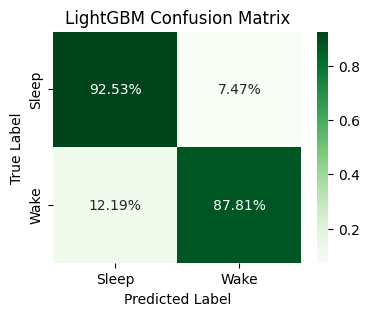

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/ut

[[8755 1647]
 [ 909 5638]]


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


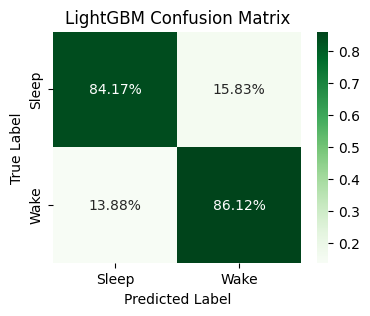

,Model,Precision,Recall,F1 Score,Specificity,AUROC,AUPRC,Accuracy,Cohen's Kappa
0,LightGBM,0.773919,0.861158,0.815211,0.841665,0.927984,0.911902,0.849195,0.67971


In [30]:
# ---- LightGBM Train Probabilities ----
lgb_prob_ls_train, lgb_len_train, lgb_true_ls_train = compute_probabilities(
    train_sids, SW_df, final_features, "lgb", final_lgb_model, group_variable
)
lgb_train_results_df = LightGBM_result(
    final_lgb_model, X_train, y_train, lgb_prob_ls_train, lgb_true_ls_train
)

# ---- LightGBM Test Probabilities ----
lgb_prob_ls_test, lgb_len_test, lgb_true_ls_test = compute_probabilities(
    test_sids, SW_df, final_features, "lgb", final_lgb_model, group_variable
)
lgb_test_results_df = LightGBM_result(
    final_lgb_model, X_test, y_test, lgb_prob_ls_test, lgb_true_ls_test
)
lgb_test_results_df

/usr/local/lib/python3.12/dist-packages/shap/explainers/_tree.py:587: UserWarning: LightGBM binary classifier with TreeExplainer shap values output has changed to a list of ndarray
  warnings.warn(
/tmp/ipython-input-1573495565.py:5: FutureWarning: The NumPy global RNG was seeded by calling `np.random.seed`. In a future version this function will no longer use the global RNG. Pass `rng` explicitly to opt-in to the new behaviour and silence this warning.
  shap.summary_plot(shap_values, X_train, plot_type="bar", feature_names=final_features)


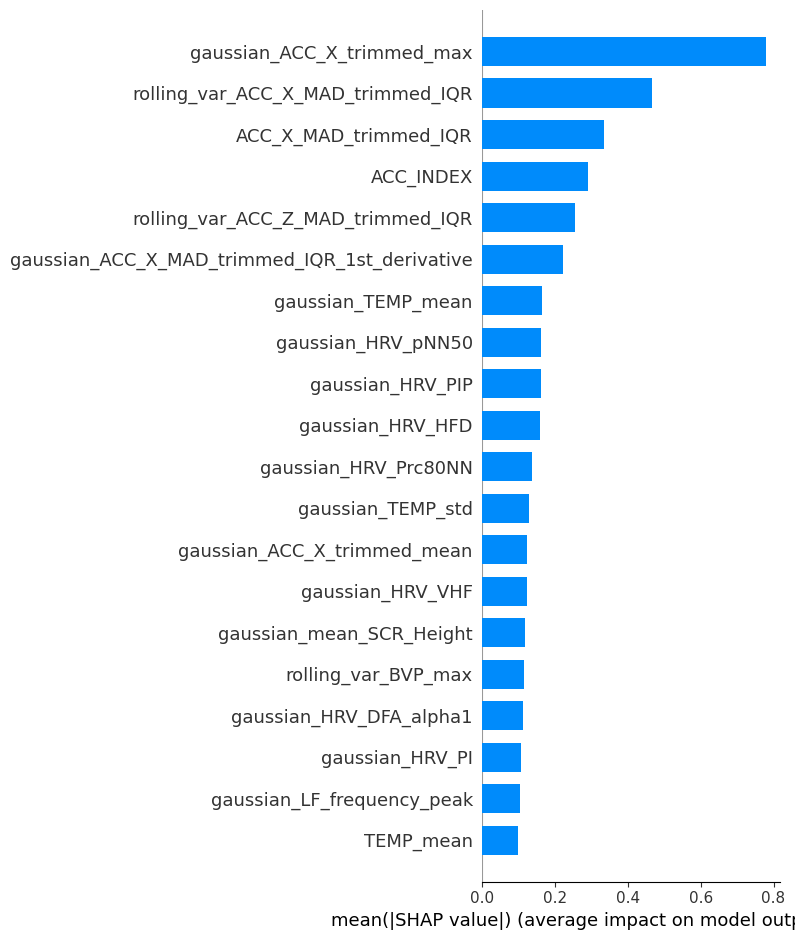

In [31]:
import shap
explainer = shap.TreeExplainer(final_lgb_model)
shap_values = explainer.shap_values(X_train)

shap.summary_plot(shap_values, X_train, plot_type="bar", feature_names=final_features)

### LightGBM and LSTM post processing

In [32]:
lgb_dataloader_train = LSTM_dataloader(
    lgb_prob_ls_train, lgb_len_train, lgb_true_ls_train, batch_size=32
)

lgb_LSTM_model = LSTM_engine(
    lgb_dataloader_train, num_epoch=300, hidden_layer_size=32, learning_rate=0.001
)

Training on cpu


/usr/local/lib/python3.12/dist-packages/torch/nn/modules/rnn.py:123: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.5 and num_layers=1
  warnings.warn(


Epoch 5/300 - Loss: 0.6732, Accuracy: 0.5115
Epoch 10/300 - Loss: 0.6280, Accuracy: 0.5115
Epoch 15/300 - Loss: 0.5452, Accuracy: 0.7451
Epoch 20/300 - Loss: 0.3834, Accuracy: 0.8079
Epoch 25/300 - Loss: 0.3232, Accuracy: 0.7977
Epoch 30/300 - Loss: 0.2989, Accuracy: 0.8080
Epoch 35/300 - Loss: 0.2849, Accuracy: 0.8126
Epoch 40/300 - Loss: 0.2765, Accuracy: 0.8118
Epoch 45/300 - Loss: 0.2733, Accuracy: 0.8115
Epoch 50/300 - Loss: 0.2706, Accuracy: 0.8125
Epoch 55/300 - Loss: 0.2683, Accuracy: 0.8130
Epoch 60/300 - Loss: 0.2661, Accuracy: 0.8135
Epoch 65/300 - Loss: 0.2639, Accuracy: 0.9277
Epoch 70/300 - Loss: 0.2616, Accuracy: 0.9277
Epoch 75/300 - Loss: 0.2590, Accuracy: 0.9277
Epoch 80/300 - Loss: 0.2560, Accuracy: 0.9282
Epoch 85/300 - Loss: 0.2557, Accuracy: 0.9299
Epoch 90/300 - Loss: 0.2526, Accuracy: 0.9290
Epoch 95/300 - Loss: 0.2504, Accuracy: 0.9290
Epoch 100/300 - Loss: 0.2486, Accuracy: 0.9294
Epoch 105/300 - Loss: 0.2469, Accuracy: 0.9299
Epoch 110/300 - Loss: 0.2452, Acc

[[9212 1190]
 [ 821 5726]]


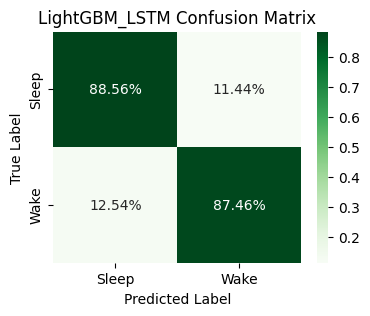

,Model,Precision,Recall,F1 Score,Specificity,AUROC,AUPRC,Accuracy,Cohen's Kappa
0,LightGBM_LSTM,0.827935,0.874599,0.850628,0.885599,0.942456,0.92359,0.88135,0.747096


In [33]:
lgb_dataloader_test = LSTM_dataloader(
    lgb_prob_ls_test, lgb_len_test, lgb_true_ls_test, batch_size=1
)

lgb_lstm_test_results_df = LSTM_eval(
    lgb_LSTM_model, lgb_dataloader_test, lgb_true_ls_test, "LightGBM_LSTM"
)
lgb_lstm_test_results_df

### GPBoosting

In [34]:
final_gpb_model = GPBoost_engine(X_train_resampled, group_train_resampled, y_train_resampled, X_val, y_val, group_val)

100%|██████████| 10/10 [01:25<00:00,  8.55s/trial, best loss: -0.7160287481196724]
Best hyperparameters: {'feature_fraction': np.float64(0.5994087949412192), 'lambda_l1': np.float64(90.0), 'lambda_l2': np.float64(5.148915092293754), 'learning_rate': np.float64(0.006955691484555707), 'max_depth': np.float64(6.0), 'neg_bagging_fraction': np.float64(0.6617342278900271), 'num_boost_round': np.float64(800.0), 'num_leaves': np.float64(100.0), 'pos_bagging_fraction': np.float64(0.8841265711728453)}


/usr/local/lib/python3.12/dist-packages/gpboost/engine.py:183: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[GPBoost] [Info] Total Bins 91238
[GPBoost] [Info] Number of data points in the train set: 66126, number of used features: 358
[GPBoost] [Info] [GPBoost with bernoulli_probit likelihood]: initscore=3.748209
[GPBoost] [Info] Start training from score 3.748209
[1]	valid_0's test_neg_log_likelihood: 0.667395
[2]	valid_0's test_neg_log_likelihood: 0.666171
[3]	valid_0's test_neg_log_likelihood: 0.664988
[4]	valid_0's test_neg_log_likelihood: 0.663785
[5]	valid_0's test_neg_log_likelihood: 0.662702
[6]	valid_0's test_neg_log_likelihood: 0.661539
[7]	valid_0's test_neg_log_likelihood: 0.660333
[8]	valid_0's test_neg_log_likelihood: 0.65907
[9]	valid_0's test_neg_log_likelihood: 0.657939
[10]	valid_0's test_neg_log_likelihood: 0.656904
[11]	valid_0's test_neg_log_likelihood: 0.655738
[12]	valid_0's test_neg_log_likelihood: 0.654593
[13]	valid_0's test_neg_log_likelihood: 0.653462
[14]	valid_0's test_neg_log_likelihood: 0.652274
[15]	valid_0's test_neg_log_likelihood: 0.651277
[16]	valid_0's t

[[30304  2759]
 [ 4622 19998]]


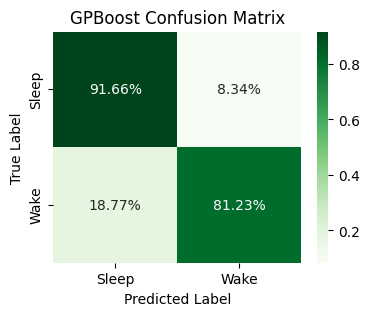

[[9105 1297]
 [1056 5491]]


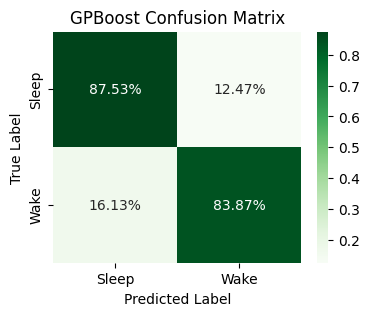

,Model,Precision,Recall,F1 Score,Specificity,AUROC,AUPRC,Accuracy,Cohen's Kappa
0,GPBoost,0.808928,0.838705,0.823547,0.875312,0.927764,0.907393,0.861172,0.702505


In [35]:
# ---- GPBoost Train Probabilities ----
gpb_prob_ls_train, gpb_len_train, gpb_true_ls_train = compute_probabilities(
    train_sids, SW_df, final_features, 'gpb', final_gpb_model, group_variable
)

gpb_train_results_df = GPBoost_result(
    final_gpb_model, X_train, y_train, group_train,
    gpb_prob_ls_train, gpb_true_ls_train
)

gpb_prob_ls_test, gpb_len_test, gpb_true_ls_test = compute_probabilities(
    test_sids, SW_df, final_features, 'gpb', final_gpb_model, group_variable
)

gpb_test_results_df = GPBoost_result(
    final_gpb_model, X_test, y_test, group_test,
    gpb_prob_ls_test, gpb_true_ls_test
)
gpb_test_results_df

In [36]:
gpb_dataloader_train = LSTM_dataloader(
    gpb_prob_ls_train, gpb_len_train, gpb_true_ls_train, batch_size=32
)

gpb_LSTM_model = LSTM_engine(
    gpb_dataloader_train, num_epoch=300, hidden_layer_size=32, learning_rate=0.001
)

Training on cpu


/usr/local/lib/python3.12/dist-packages/torch/nn/modules/rnn.py:123: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.5 and num_layers=1
  warnings.warn(


Epoch 5/300 - Loss: 0.6655, Accuracy: 0.5114
Epoch 10/300 - Loss: 0.6366, Accuracy: 0.5114
Epoch 15/300 - Loss: 0.5869, Accuracy: 0.5876
Epoch 20/300 - Loss: 0.4592, Accuracy: 0.7657
Epoch 25/300 - Loss: 0.3691, Accuracy: 0.7712
Epoch 30/300 - Loss: 0.3453, Accuracy: 0.7785
Epoch 35/300 - Loss: 0.3235, Accuracy: 0.7890
Epoch 40/300 - Loss: 0.3172, Accuracy: 0.7892
Epoch 45/300 - Loss: 0.3139, Accuracy: 0.9029
Epoch 50/300 - Loss: 0.3111, Accuracy: 0.9029
Epoch 55/300 - Loss: 0.3082, Accuracy: 0.9031
Epoch 60/300 - Loss: 0.3058, Accuracy: 0.9045
Epoch 65/300 - Loss: 0.3036, Accuracy: 0.9043
Epoch 70/300 - Loss: 0.3018, Accuracy: 0.9043
Epoch 75/300 - Loss: 0.3000, Accuracy: 0.9046
Epoch 80/300 - Loss: 0.2982, Accuracy: 0.9044
Epoch 85/300 - Loss: 0.2962, Accuracy: 0.9046
Epoch 90/300 - Loss: 0.2940, Accuracy: 0.9052
Epoch 95/300 - Loss: 0.2922, Accuracy: 0.9054
Epoch 100/300 - Loss: 0.2907, Accuracy: 0.9050
Epoch 105/300 - Loss: 0.2889, Accuracy: 0.9055
Epoch 110/300 - Loss: 0.2896, Acc

[[9266 1136]
 [ 764 5783]]


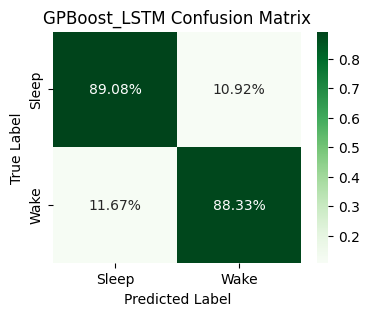

In [37]:
gpb_dataloader_test = LSTM_dataloader(
    gpb_prob_ls_test, gpb_len_test, gpb_true_ls_test, batch_size=1
)

gpb_lstm_test_results_df = LSTM_eval(
    gpb_LSTM_model, gpb_dataloader_test, gpb_true_ls_test, "GPBoost_LSTM"
)

In [38]:
lgb_transformer_train = LSTM_dataloader(
    lgb_prob_ls_train, lgb_len_train, lgb_true_ls_train, batch_size=32
)

Transformer_model_lgb = Transformer_engine(
    lgb_transformer_train,
    num_epoch=50,
    d_model=128,
    nhead=8,
    hidden_dim=256,
    learning_rate=0.001
)

Epoch 10, Loss=0.2390
Epoch 20, Loss=0.2200
Epoch 30, Loss=0.2150
Epoch 40, Loss=0.2120
Epoch 50, Loss=0.2082


In [39]:
lgb_transformer_test = LSTM_dataloader(
    lgb_prob_ls_test, lgb_len_test, lgb_true_ls_test, batch_size=1
)

lgb_transformer_test_results_df = Transformer_eval(
    Transformer_model_lgb,
    lgb_transformer_test,
    lgb_true_ls_test,
    "LightGBM_Transformer"
)
lgb_transformer_test_results_df

,Model,Precision,Recall,F1 Score,Specificity,AUROC,AUPRC,Accuracy,Cohen's Kappa
0,LightGBM_Transformer,0.771393,0.863296,0.814761,0.838973,0.927347,0.908048,0.848369,0.67857


In [40]:
gpb_transformer_train = LSTM_dataloader(
    gpb_prob_ls_train, gpb_len_train, gpb_true_ls_train, batch_size=32
)

Transformer_model_gpb = Transformer_engine(
    gpb_transformer_train,
    num_epoch=50,
    d_model=128,
    nhead=8,
    hidden_dim=256,
    learning_rate=0.001
)

Epoch 10, Loss=0.3039
Epoch 20, Loss=0.2725
Epoch 30, Loss=0.2675
Epoch 40, Loss=0.2649
Epoch 50, Loss=0.2619


In [41]:
gpb_transformer_test = LSTM_dataloader(
    gpb_prob_ls_test, gpb_len_test, gpb_true_ls_test, batch_size=1
)

gpb_transformer_test_results_df = Transformer_eval(
    Transformer_model_gpb,
    gpb_transformer_test,
    gpb_true_ls_test,
    "GPBoost_Transformer"
)
gpb_transformer_test_results_df

,Model,Precision,Recall,F1 Score,Specificity,AUROC,AUPRC,Accuracy,Cohen's Kappa
0,GPBoost_Transformer,0.767929,0.873377,0.817266,0.833878,0.929913,0.911726,0.849136,0.682222


In [42]:
overall_result = pd.concat([
    lgb_test_results_df,
    lgb_lstm_test_results_df,
    lgb_transformer_test_results_df,
    gpb_test_results_df,
    gpb_lstm_test_results_df,
    gpb_transformer_test_results_df
])
print(group_variable)
overall_result_ahi_severity

['AHI_Severity']


,Model,Precision,Recall,F1 Score,Specificity,AUROC,AUPRC,Accuracy,Cohen's Kappa
0,LightGBM,0.773919,0.861158,0.815211,0.841665,0.927984,0.911902,0.849195,0.679710
0,LightGBM_LSTM,0.827935,0.874599,0.850628,0.885599,0.942456,0.923590,0.881350,0.747096
0,LightGBM_Transformer,0.771393,0.863296,0.814761,0.838973,0.927347,0.908048,0.848369,0.678570
0,GPBoost,0.808928,0.838705,0.823547,0.875312,0.927764,0.907393,0.861172,0.702505
0,GPBoost_LSTM,0.835814,0.883305,0.858904,0.890790,0.944529,0.916441,0.887899,0.763170
0,GPBoost_Transformer,0.767929,0.873377,0.817266,0.833878,0.929913,0.911726,0.849136,0.682222


In [ ]:
overall_result.to_csv('overall_result_ahi_severity.csv')

## Obesity

In [43]:
#Obesity
group_variable = get_variable(group_variables, idx = 1) # set your variable
X_train, y_train, group_train = train_test_split(SW_df, train_sids, final_features, group_variable)
print("Train data balance: ")
print(np.unique(y_train, return_counts=True))
print('')

X_val, y_val, group_val = train_test_split(SW_df, val_sids, final_features, group_variable)
print("Validation data balancepredicted_probabilitiese: ")
print(np.unique(y_val, return_counts=True))
print('')

X_test, y_test, group_test = train_test_split(SW_df, test_sids, final_features, group_variable)
print("Test data balance: ")
print(np.unique(y_test, return_counts=True))
print(y_train.sum())

Train data balance: 
(array([0., 1.]), array([33063, 24620]))

Validation data balancepredicted_probabilitiese: 
(array([0., 1.]), array([5001, 3038]))

Test data balance: 
(array([0., 1.]), array([10402,  6547]))
24620.0


## Light GBM

In [44]:
X_train_resampled, y_train_resampled, group_train_resampled = resample_data(X_train, y_train, group_train, group_variable)
final_lgb_model = LightGBM_engine(X_train_resampled, y_train_resampled, X_val, y_val)

  2%|▏         | 1/50 [00:01<01:22,  1.68s/trial, best loss: -0.6890877598152425]

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(



  4%|▍         | 2/50 [00:03<01:23,  1.75s/trial, best loss: -0.6890877598152425]

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(



  6%|▌         | 3/50 [00:05<01:32,  1.97s/trial, best loss: -0.6890877598152425]

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(



  8%|▊         | 4/50 [00:06<01:16,  1.67s/trial, best loss: -0.6890877598152425]

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(



 10%|█         | 5/50 [00:08<01:09,  1.55s/trial, best loss: -0.6890877598152425]

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(



 12%|█▏        | 6/50 [00:10<01:11,  1.63s/trial, best loss: -0.6937078973770961]

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(



 14%|█▍        | 7/50 [00:11<01:13,  1.70s/trial, best loss: -0.6937078973770961]

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(



 16%|█▌        | 8/50 [00:13<01:06,  1.58s/trial, best loss: -0.6937078973770961]

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(



 18%|█▊        | 9/50 [00:14<01:03,  1.56s/trial, best loss: -0.6937078973770961]

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(



 20%|██        | 10/50 [00:16<01:03,  1.58s/trial, best loss: -0.6937078973770961]

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(



 22%|██▏       | 11/50 [00:18<01:06,  1.70s/trial, best loss: -0.6937078973770961]

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(



 24%|██▍       | 12/50 [00:20<01:11,  1.89s/trial, best loss: -0.6937078973770961]

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(



 26%|██▌       | 13/50 [00:22<01:05,  1.77s/trial, best loss: -0.6937078973770961]

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(



 28%|██▊       | 14/50 [00:23<01:00,  1.69s/trial, best loss: -0.6937078973770961]

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(



 30%|███       | 15/50 [00:25<00:59,  1.71s/trial, best loss: -0.6937078973770961]

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(



 32%|███▏      | 16/50 [00:26<00:53,  1.57s/trial, best loss: -0.6937078973770961]

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(



 34%|███▍      | 17/50 [00:28<00:54,  1.64s/trial, best loss: -0.6937078973770961]

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(



 36%|███▌      | 18/50 [00:30<00:52,  1.64s/trial, best loss: -0.6937078973770961]

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(



 38%|███▊      | 19/50 [00:32<00:58,  1.89s/trial, best loss: -0.6937078973770961]

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(



 40%|████      | 20/50 [00:34<00:56,  1.87s/trial, best loss: -0.6937078973770961]

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(



 42%|████▏     | 21/50 [00:36<00:55,  1.90s/trial, best loss: -0.6937078973770961]

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(



 44%|████▍     | 22/50 [00:38<00:53,  1.92s/trial, best loss: -0.6937078973770961]

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(



 46%|████▌     | 23/50 [00:41<01:00,  2.23s/trial, best loss: -0.6962552011095701]

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(



 48%|████▊     | 24/50 [00:43<00:55,  2.14s/trial, best loss: -0.6962552011095701]

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(



 50%|█████     | 25/50 [00:46<00:58,  2.35s/trial, best loss: -0.7047443574389682]

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(



 52%|█████▏    | 26/50 [00:50<01:08,  2.87s/trial, best loss: -0.7080726384861895]

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(



 54%|█████▍    | 27/50 [00:53<01:11,  3.10s/trial, best loss: -0.7080726384861895]

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(



 56%|█████▌    | 28/50 [00:57<01:12,  3.30s/trial, best loss: -0.7080726384861895]

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(



 58%|█████▊    | 29/50 [00:59<01:01,  2.93s/trial, best loss: -0.7080726384861895]

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(



 60%|██████    | 30/50 [01:02<00:57,  2.89s/trial, best loss: -0.7080726384861895]

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(



 62%|██████▏   | 31/50 [01:04<00:49,  2.60s/trial, best loss: -0.7080726384861895]

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(



 64%|██████▍   | 32/50 [01:07<00:51,  2.85s/trial, best loss: -0.7080726384861895]

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(



 66%|██████▌   | 33/50 [01:10<00:49,  2.90s/trial, best loss: -0.7080726384861895]

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(



 68%|██████▊   | 34/50 [01:13<00:47,  2.98s/trial, best loss: -0.7080726384861895]

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(



 70%|███████   | 35/50 [01:16<00:40,  2.73s/trial, best loss: -0.7080726384861895]

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(



 72%|███████▏  | 36/50 [01:18<00:36,  2.60s/trial, best loss: -0.7080726384861895]

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(



 74%|███████▍  | 37/50 [01:21<00:36,  2.77s/trial, best loss: -0.7080726384861895]

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(



 76%|███████▌  | 38/50 [01:24<00:32,  2.67s/trial, best loss: -0.7080726384861895]

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(



 78%|███████▊  | 39/50 [01:26<00:27,  2.53s/trial, best loss: -0.7080726384861895]

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(



 80%|████████  | 40/50 [01:28<00:24,  2.40s/trial, best loss: -0.7080726384861895]

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(



 82%|████████▏ | 41/50 [01:30<00:20,  2.30s/trial, best loss: -0.7080726384861895]

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(



 84%|████████▍ | 42/50 [01:32<00:18,  2.35s/trial, best loss: -0.7080726384861895]

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(



 86%|████████▌ | 43/50 [01:34<00:15,  2.17s/trial, best loss: -0.7080726384861895]

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(



 88%|████████▊ | 44/50 [01:38<00:15,  2.66s/trial, best loss: -0.7080726384861895]

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(



 90%|█████████ | 45/50 [01:41<00:13,  2.67s/trial, best loss: -0.7080726384861895]

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(



 92%|█████████▏| 46/50 [01:44<00:11,  2.98s/trial, best loss: -0.7080726384861895]

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(



 94%|█████████▍| 47/50 [01:47<00:08,  2.92s/trial, best loss: -0.7080726384861895]

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(



 96%|█████████▌| 48/50 [01:50<00:05,  2.95s/trial, best loss: -0.7080726384861895]

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(



 98%|█████████▊| 49/50 [01:52<00:02,  2.78s/trial, best loss: -0.7080726384861895]

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(



100%|██████████| 50/50 [01:56<00:00,  2.32s/trial, best loss: -0.7080726384861895]

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(




Best hyperparameters: {'learning_rate': np.float64(0.27053176435038606), 'max_depth': np.float64(6.0), 'n_estimators': np.float64(250.0), 'num_leaves': np.float64(20.0), 'reg_alpha': np.float64(16.0), 'reg_lambda': np.float64(4.206362048168878)}


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/ut

[[30909  2154]
 [ 2674 21946]]


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


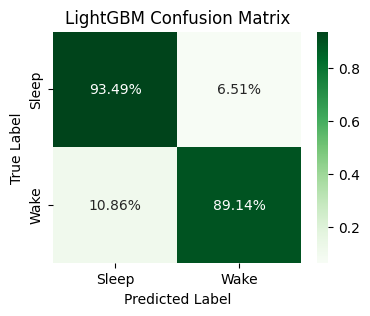

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/ut

[[8783 1619]
 [ 869 5678]]


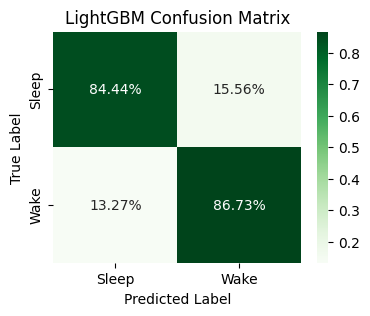

,Model,Precision,Recall,F1 Score,Specificity,AUROC,AUPRC,Accuracy,Cohen's Kappa
0,LightGBM,0.778128,0.867267,0.820283,0.844357,0.930557,0.913582,0.853207,0.688263


In [45]:
# ---- LightGBM Train Probabilities ----
lgb_prob_ls_train, lgb_len_train, lgb_true_ls_train = compute_probabilities(
    train_sids, SW_df, final_features, "lgb", final_lgb_model, group_variable
)
lgb_train_results_df = LightGBM_result(
    final_lgb_model, X_train, y_train, lgb_prob_ls_train, lgb_true_ls_train
)

# ---- LightGBM Test Probabilities ----
lgb_prob_ls_test, lgb_len_test, lgb_true_ls_test = compute_probabilities(
    test_sids, SW_df, final_features, "lgb", final_lgb_model, group_variable
)
lgb_test_results_df = LightGBM_result(
    final_lgb_model, X_test, y_test, lgb_prob_ls_test, lgb_true_ls_test
)
lgb_test_results_df

/usr/local/lib/python3.12/dist-packages/shap/explainers/_tree.py:587: UserWarning: LightGBM binary classifier with TreeExplainer shap values output has changed to a list of ndarray
  warnings.warn(
/tmp/ipython-input-1573495565.py:5: FutureWarning: The NumPy global RNG was seeded by calling `np.random.seed`. In a future version this function will no longer use the global RNG. Pass `rng` explicitly to opt-in to the new behaviour and silence this warning.
  shap.summary_plot(shap_values, X_train, plot_type="bar", feature_names=final_features)


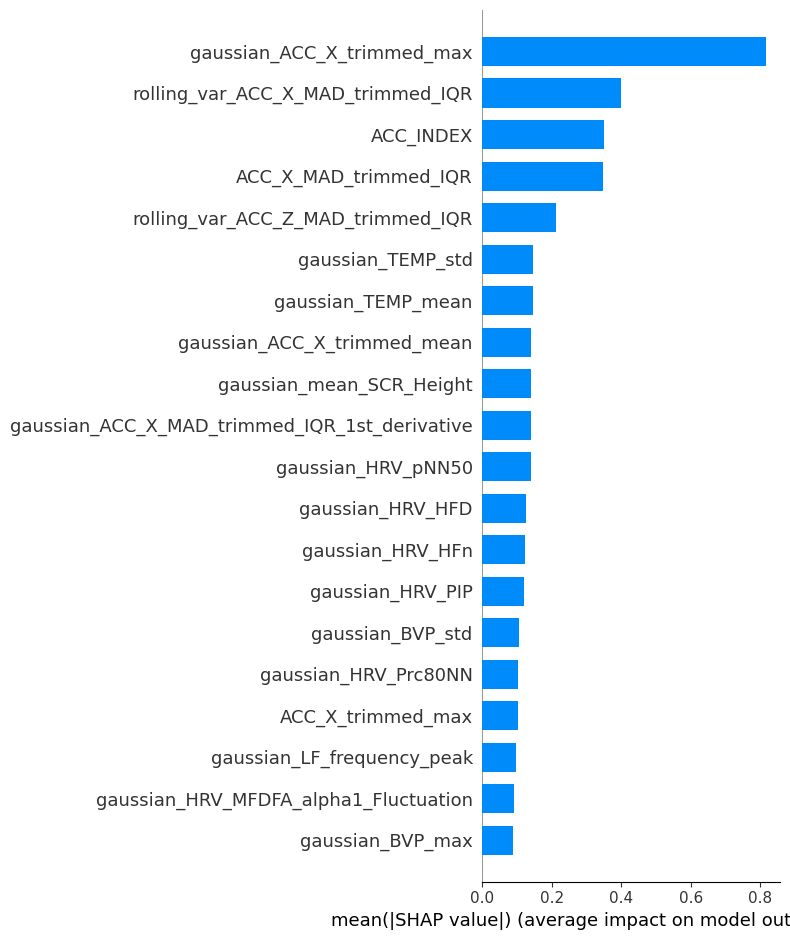

In [46]:
import shap
explainer = shap.TreeExplainer(final_lgb_model)
shap_values = explainer.shap_values(X_train)

shap.summary_plot(shap_values, X_train, plot_type="bar", feature_names=final_features)

In [47]:
lgb_dataloader_train = LSTM_dataloader(
    lgb_prob_ls_train, lgb_len_train, lgb_true_ls_train, batch_size=32
)

lgb_LSTM_model = LSTM_engine(
    lgb_dataloader_train, num_epoch=300, hidden_layer_size=32, learning_rate=0.001
)

/usr/local/lib/python3.12/dist-packages/torch/nn/modules/rnn.py:123: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.5 and num_layers=1
  warnings.warn(


Training on cpu
Epoch 5/300 - Loss: 0.6520, Accuracy: 0.6254
Epoch 10/300 - Loss: 0.6183, Accuracy: 0.6254
Epoch 15/300 - Loss: 0.5537, Accuracy: 0.8728
Epoch 20/300 - Loss: 0.3862, Accuracy: 0.9265
Epoch 25/300 - Loss: 0.2909, Accuracy: 0.9190
Epoch 30/300 - Loss: 0.2666, Accuracy: 0.9257
Epoch 35/300 - Loss: 0.2562, Accuracy: 0.9306
Epoch 40/300 - Loss: 0.2485, Accuracy: 0.9298
Epoch 45/300 - Loss: 0.2457, Accuracy: 0.9294
Epoch 50/300 - Loss: 0.2428, Accuracy: 0.9303
Epoch 55/300 - Loss: 0.2407, Accuracy: 0.9300
Epoch 60/300 - Loss: 0.2387, Accuracy: 0.9301
Epoch 65/300 - Loss: 0.2369, Accuracy: 0.9302
Epoch 70/300 - Loss: 0.2352, Accuracy: 0.9302
Epoch 75/300 - Loss: 0.2336, Accuracy: 0.9304
Epoch 80/300 - Loss: 0.2321, Accuracy: 0.9306
Epoch 85/300 - Loss: 0.2307, Accuracy: 0.9306
Epoch 90/300 - Loss: 0.2292, Accuracy: 0.9307
Epoch 95/300 - Loss: 0.2278, Accuracy: 0.9311
Epoch 100/300 - Loss: 0.2264, Accuracy: 0.9314
Epoch 105/300 - Loss: 0.2249, Accuracy: 0.9317
Epoch 110/300 - L

[[9106 1296]
 [ 749 5798]]


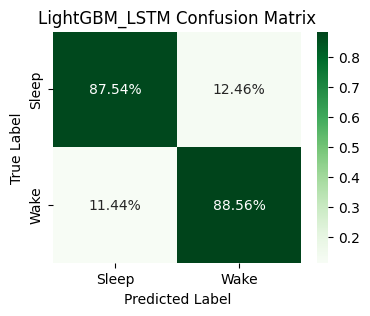

,Model,Precision,Recall,F1 Score,Specificity,AUROC,AUPRC,Accuracy,Cohen's Kappa
0,LightGBM_LSTM,0.81731,0.885596,0.850084,0.875409,0.94189,0.921299,0.879344,0.745226


In [48]:
lgb_dataloader_test = LSTM_dataloader(
    lgb_prob_ls_test, lgb_len_test, lgb_true_ls_test, batch_size=1
)

lgb_lstm_test_results_df = LSTM_eval(
    lgb_LSTM_model, lgb_dataloader_test, lgb_true_ls_test, "LightGBM_LSTM"
)
lgb_lstm_test_results_df

In [49]:
final_gpb_model = GPBoost_engine(X_train_resampled, group_train_resampled, y_train_resampled, X_val, y_val, group_val)

100%|██████████| 10/10 [01:12<00:00,  7.26s/trial, best loss: -0.706513168269989]
Best hyperparameters: {'feature_fraction': np.float64(0.606689774363279), 'lambda_l1': np.float64(90.0), 'lambda_l2': np.float64(4.457859823166904), 'learning_rate': np.float64(0.00909408506468291), 'max_depth': np.float64(6.0), 'neg_bagging_fraction': np.float64(0.6525371253959609), 'num_boost_round': np.float64(600.0), 'num_leaves': np.float64(120.0), 'pos_bagging_fraction': np.float64(0.804694384929233)}


/usr/local/lib/python3.12/dist-packages/gpboost/engine.py:183: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[GPBoost] [Info] Total Bins 91238
[GPBoost] [Info] Number of data points in the train set: 66126, number of used features: 358
[GPBoost] [Info] [GPBoost with bernoulli_probit likelihood]: initscore=3.803150
[GPBoost] [Info] Start training from score 3.803150
[1]	valid_0's test_neg_log_likelihood: 0.681286
[2]	valid_0's test_neg_log_likelihood: 0.679457
[3]	valid_0's test_neg_log_likelihood: 0.677832
[4]	valid_0's test_neg_log_likelihood: 0.676027
[5]	valid_0's test_neg_log_likelihood: 0.67464
[6]	valid_0's test_neg_log_likelihood: 0.673013
[7]	valid_0's test_neg_log_likelihood: 0.671279
[8]	valid_0's test_neg_log_likelihood: 0.669681
[9]	valid_0's test_neg_log_likelihood: 0.668053
[10]	valid_0's test_neg_log_likelihood: 0.666629
[11]	valid_0's test_neg_log_likelihood: 0.665097
[12]	valid_0's test_neg_log_likelihood: 0.663436
[13]	valid_0's test_neg_log_likelihood: 0.661932
[14]	valid_0's test_neg_log_likelihood: 0.660331
[15]	valid_0's test_neg_log_likelihood: 0.658944
[16]	valid_0's t

[[30034  3029]
 [ 4377 20243]]


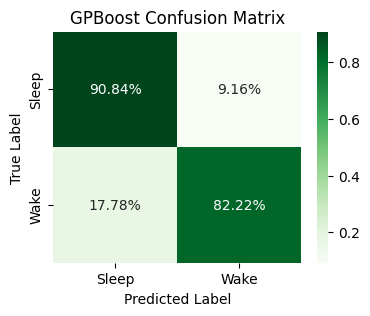

[[9147 1255]
 [1039 5508]]


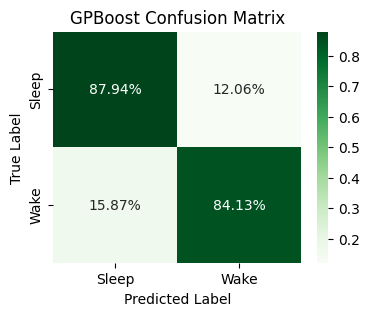

,Model,Precision,Recall,F1 Score,Specificity,AUROC,AUPRC,Accuracy,Cohen's Kappa
0,GPBoost,0.814431,0.841301,0.827648,0.87935,0.929302,0.91289,0.864653,0.708223


In [50]:
# ---- GPBoost Train Probabilities ----
gpb_prob_ls_train, gpb_len_train, gpb_true_ls_train = compute_probabilities(
    train_sids, SW_df, final_features, 'gpb', final_gpb_model, group_variable
)

gpb_train_results_df = GPBoost_result(
    final_gpb_model, X_train, y_train, group_train,
    gpb_prob_ls_train, gpb_true_ls_train
)

gpb_prob_ls_test, gpb_len_test, gpb_true_ls_test = compute_probabilities(
    test_sids, SW_df, final_features, 'gpb', final_gpb_model, group_variable
)

gpb_test_results_df = GPBoost_result(
    final_gpb_model, X_test, y_test, group_test,
    gpb_prob_ls_test, gpb_true_ls_test
)
gpb_test_results_df

In [51]:
gpb_dataloader_train = LSTM_dataloader(
    gpb_prob_ls_train, gpb_len_train, gpb_true_ls_train, batch_size=32
)

gpb_LSTM_model = LSTM_engine(
    gpb_dataloader_train, num_epoch=300, hidden_layer_size=32, learning_rate=0.001
)

Training on cpu


/usr/local/lib/python3.12/dist-packages/torch/nn/modules/rnn.py:123: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.5 and num_layers=1
  warnings.warn(


Epoch 5/300 - Loss: 0.6703, Accuracy: 0.5114
Epoch 10/300 - Loss: 0.6405, Accuracy: 0.5114
Epoch 15/300 - Loss: 0.5946, Accuracy: 0.6247
Epoch 20/300 - Loss: 0.4836, Accuracy: 0.7701
Epoch 25/300 - Loss: 0.3683, Accuracy: 0.7753
Epoch 30/300 - Loss: 0.3372, Accuracy: 0.7820
Epoch 35/300 - Loss: 0.3238, Accuracy: 0.9009
Epoch 40/300 - Loss: 0.3163, Accuracy: 0.8994
Epoch 45/300 - Loss: 0.3126, Accuracy: 0.9014
Epoch 50/300 - Loss: 0.3091, Accuracy: 0.9020
Epoch 55/300 - Loss: 0.3060, Accuracy: 0.9026
Epoch 60/300 - Loss: 0.3036, Accuracy: 0.9031
Epoch 65/300 - Loss: 0.3015, Accuracy: 0.9034
Epoch 70/300 - Loss: 0.2997, Accuracy: 0.9038
Epoch 75/300 - Loss: 0.2982, Accuracy: 0.9039
Epoch 80/300 - Loss: 0.2965, Accuracy: 0.9040
Epoch 85/300 - Loss: 0.2957, Accuracy: 0.9044
Epoch 90/300 - Loss: 0.2940, Accuracy: 0.9041
Epoch 95/300 - Loss: 0.2930, Accuracy: 0.9034
Epoch 100/300 - Loss: 0.2918, Accuracy: 0.9046
Epoch 105/300 - Loss: 0.2906, Accuracy: 0.9042
Epoch 110/300 - Loss: 0.2881, Acc

[[9316 1086]
 [ 792 5755]]


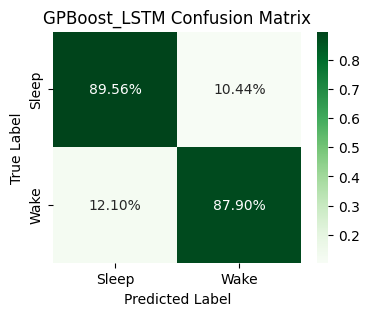

In [52]:
gpb_dataloader_test = LSTM_dataloader(
    gpb_prob_ls_test, gpb_len_test, gpb_true_ls_test, batch_size=1
)

gpb_lstm_test_results_df = LSTM_eval(
    gpb_LSTM_model, gpb_dataloader_test, gpb_true_ls_test, "GPBoost_LSTM"
)

In [53]:
lgb_transformer_train = LSTM_dataloader(
    lgb_prob_ls_train, lgb_len_train, lgb_true_ls_train, batch_size=32
)

Transformer_model_lgb = Transformer_engine(
    lgb_transformer_train,
    num_epoch=50,
    d_model=128,
    nhead=8,
    hidden_dim=256,
    learning_rate=0.001
)

Epoch 10, Loss=0.2284
Epoch 20, Loss=0.1984
Epoch 30, Loss=0.1956
Epoch 40, Loss=0.1927
Epoch 50, Loss=0.1890


In [54]:
lgb_transformer_test = LSTM_dataloader(
    lgb_prob_ls_test, lgb_len_test, lgb_true_ls_test, batch_size=1
)

lgb_transformer_test_results_df = Transformer_eval(
    Transformer_model_lgb,
    lgb_transformer_test,
    lgb_true_ls_test,
    "LightGBM_Transformer"
)
lgb_transformer_test_results_df

,Model,Precision,Recall,F1 Score,Specificity,AUROC,AUPRC,Accuracy,Cohen's Kappa
0,LightGBM_Transformer,0.776789,0.866962,0.819402,0.843203,0.930306,0.912232,0.852381,0.686595


In [55]:
gpb_transformer_train = LSTM_dataloader(
    gpb_prob_ls_train, gpb_len_train, gpb_true_ls_train, batch_size=32
)

Transformer_model_gpb = Transformer_engine(
    gpb_transformer_train,
    num_epoch=50,
    d_model=128,
    nhead=8,
    hidden_dim=256,
    learning_rate=0.001
)

Epoch 10, Loss=0.2894
Epoch 20, Loss=0.2725
Epoch 30, Loss=0.2685
Epoch 40, Loss=0.2644
Epoch 50, Loss=0.2617


In [56]:
gpb_transformer_test = LSTM_dataloader(
    gpb_prob_ls_test, gpb_len_test, gpb_true_ls_test, batch_size=1
)

gpb_transformer_test_results_df = Transformer_eval(
    Transformer_model_gpb,
    gpb_transformer_test,
    gpb_true_ls_test,
    "GPBoost_Transformer"
)
gpb_transformer_test_results_df

,Model,Precision,Recall,F1 Score,Specificity,AUROC,AUPRC,Accuracy,Cohen's Kappa
0,GPBoost_Transformer,0.773346,0.876585,0.821735,0.8383,0.931851,0.916152,0.853089,0.688576


In [57]:
overall_result_obesity = pd.concat([
    lgb_test_results_df,
    lgb_lstm_test_results_df,
    lgb_transformer_test_results_df,
    gpb_test_results_df,
    gpb_lstm_test_results_df,
    gpb_transformer_test_results_df
])
print(group_variable)
overall_result_obesity

['Obesity']


,Model,Precision,Recall,F1 Score,Specificity,AUROC,AUPRC,Accuracy,Cohen's Kappa
0,LightGBM,0.778128,0.867267,0.820283,0.844357,0.930557,0.913582,0.853207,0.688263
0,LightGBM_LSTM,0.817310,0.885596,0.850084,0.875409,0.941890,0.921299,0.879344,0.745226
0,LightGBM_Transformer,0.776789,0.866962,0.819402,0.843203,0.930306,0.912232,0.852381,0.686595
0,GPBoost,0.814431,0.841301,0.827648,0.879350,0.929302,0.912890,0.864653,0.708223
0,GPBoost_LSTM,0.841251,0.879029,0.859725,0.895597,0.946831,0.922853,0.889197,0.765028
0,GPBoost_Transformer,0.773346,0.876585,0.821735,0.838300,0.931851,0.916152,0.853089,0.688576


In [60]:
overall_result_obesity.to_csv('overall_result_obesity.csv')
overall_result.to_csv('overall_result_ahi_severity.csv')

In [59]:
print('AHI Severity: ')
display(overall_result)
print(group_variable)
display(overall_result_obesity)


AHI Severity: 


,Model,Precision,Recall,F1 Score,Specificity,AUROC,AUPRC,Accuracy,Cohen's Kappa
0,LightGBM,0.773919,0.861158,0.815211,0.841665,0.927984,0.911902,0.849195,0.679710
0,LightGBM_LSTM,0.827935,0.874599,0.850628,0.885599,0.942456,0.923590,0.881350,0.747096
0,LightGBM_Transformer,0.771393,0.863296,0.814761,0.838973,0.927347,0.908048,0.848369,0.678570
0,GPBoost,0.808928,0.838705,0.823547,0.875312,0.927764,0.907393,0.861172,0.702505
0,GPBoost_LSTM,0.835814,0.883305,0.858904,0.890790,0.944529,0.916441,0.887899,0.763170
0,GPBoost_Transformer,0.767929,0.873377,0.817266,0.833878,0.929913,0.911726,0.849136,0.682222


['Obesity']


,Model,Precision,Recall,F1 Score,Specificity,AUROC,AUPRC,Accuracy,Cohen's Kappa
0,LightGBM,0.778128,0.867267,0.820283,0.844357,0.930557,0.913582,0.853207,0.688263
0,LightGBM_LSTM,0.817310,0.885596,0.850084,0.875409,0.941890,0.921299,0.879344,0.745226
0,LightGBM_Transformer,0.776789,0.866962,0.819402,0.843203,0.930306,0.912232,0.852381,0.686595
0,GPBoost,0.814431,0.841301,0.827648,0.879350,0.929302,0.912890,0.864653,0.708223
0,GPBoost_LSTM,0.841251,0.879029,0.859725,0.895597,0.946831,0.922853,0.889197,0.765028
0,GPBoost_Transformer,0.773346,0.876585,0.821735,0.838300,0.931851,0.916152,0.853089,0.688576


Note:
The above output will vary if you run through the notebook again due to the randomness of the train/test splitting.